In [642]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wine_df = pd.read_csv("wine.csv")


In [643]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [644]:
# Drop all irrelevant and redundant columns in data set.
wine_df.drop('description',axis=1, inplace=True)
wine_df.drop('region_2',axis=1, inplace=True)
wine_df.drop('designation',axis=1, inplace=True)
wine_df.drop('region_1',axis=1, inplace=True)
wine_df.drop('winery',axis=1, inplace=True)
wine_df.drop('province',axis=1, inplace=True)


In [645]:
# get the number of missing data points per column
wine_df.isnull().sum()



Unnamed: 0     0
country        0
points         0
price         57
variety        0
dtype: int64

In [646]:
# Drop all rows with missing data points.
wine_df.dropna(inplace=True)
wine_df.isnull().sum()



Unnamed: 0    0
country       0
points        0
price         0
variety       0
dtype: int64

In [647]:
# Delete any duplicate rows.
wine_df.drop_duplicates(keep='first',inplace=True)

Text(0, 0.5, 'Wine Variety')

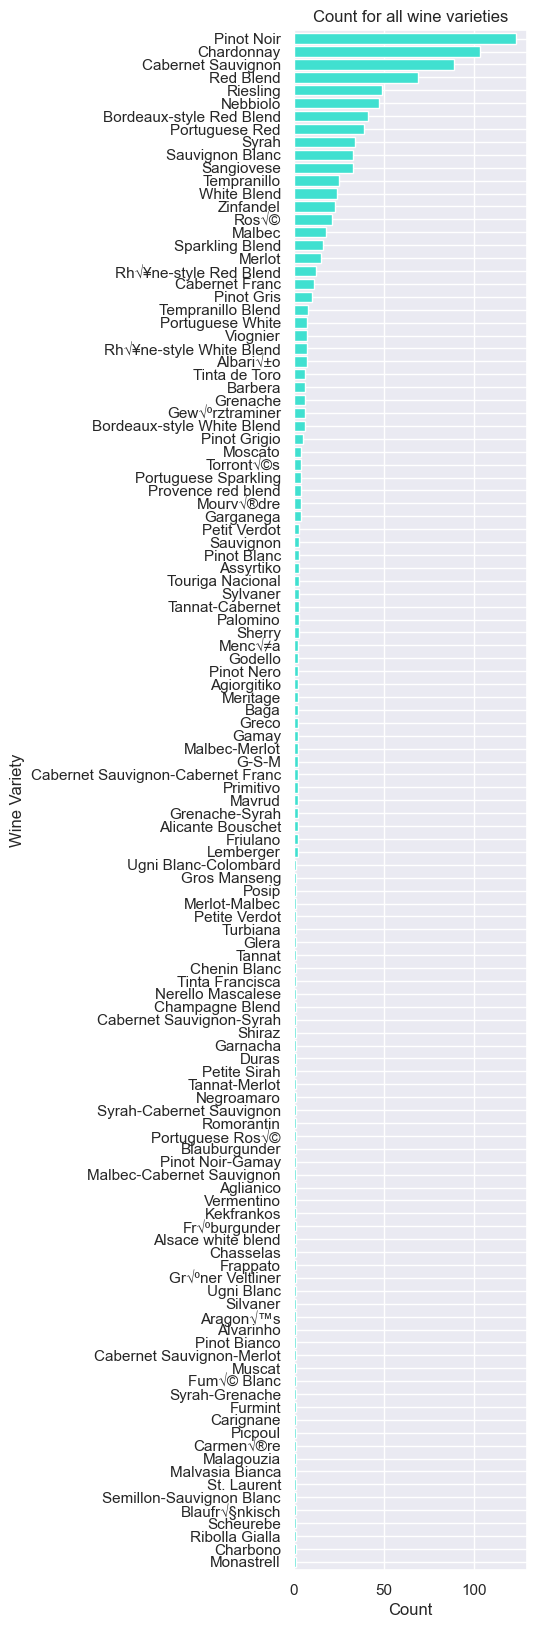

In [648]:
# Visualizing all the wine varieties.
variety = wine_df.variety.value_counts(ascending=True)
sns.set(rc={"figure.figsize":(3, 20)})
variety.plot.barh(width = 0.8, color = 'turquoise')
plt.title('Count for all wine varieties')
plt.xlabel('Count')
plt.ylabel('Wine Variety')



In [649]:
# Filter wine varieties Merlot, Pinotage, Cabernet Sauvignon, Shiraz, Sauvignon blanc, Pinot Noir and Chardonnay.
wine_df = wine_df[(wine_df.variety =='Merlot') | (wine_df.variety == 'Shiraz') | (wine_df.variety == 'Cabernet Sauvignon') | (wine_df.variety == 'Pinot Noir') | (wine_df.variety == 'Chardonnay')|(wine_df.variety == 'Sauvignon Blanc')]
wine_df.variety.unique()

array(['Cabernet Sauvignon', 'Sauvignon Blanc', 'Pinot Noir',
       'Chardonnay', 'Merlot', 'Shiraz'], dtype=object)

Text(0, 0.5, 'Wine Variety')

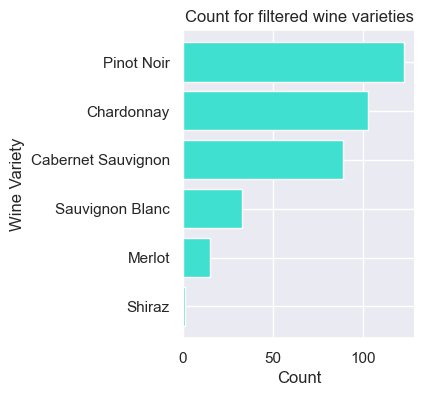

In [650]:
sns.set(rc={"figure.figsize":(3, 4)})
filtered_variety = wine_df.variety.value_counts(ascending=True)
filtered_variety.plot.barh(width = 0.8, color = 'turquoise')
plt.title('Count for filtered wine varieties')
plt.xlabel('Count')
plt.ylabel('Wine Variety')
# The count for the different wine varieties.

In [658]:
wine_df.sort_values('price', ascending=False)

,Unnamed: 0,country,points,price,variety
16,16,US,95,325.0,Cabernet Sauvignon
0,0,US,96,235.0,Cabernet Sauvignon
231,231,US,93,200.0,Cabernet Sauvignon
14,14,US,95,185.0,Pinot Noir
313,313,US,94,155.0,Cabernet Sauvignon
...,...,...,...,...,...
455,455,Argentina,86,10.0,Sauvignon Blanc
196,196,US,87,10.0,Chardonnay
90,90,US,86,10.0,Cabernet Sauvignon
1071,1071,Romania,88,9.0,Pinot Noir


Text(0, 0.5, 'Wine Variety')

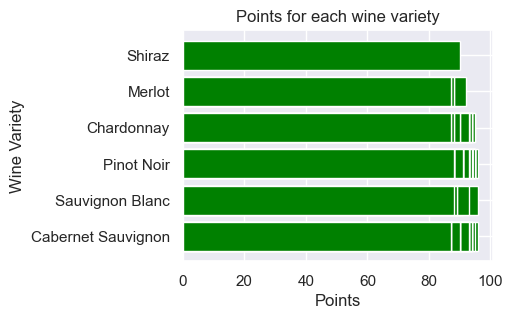

In [651]:
# The top wine varieties by points.
sns.set(rc={"figure.figsize":(4, 3)})
x = wine_df.variety
y = wine_df.points
plt.barh(x, y, color='green')
plt.title('Points for each wine variety')
plt.xlabel('Points')
plt.ylabel('Wine Variety')



In [652]:
# Data grouped by variety and sorted by points.
group = wine_df.groupby('variety')
data_avg = round(group.mean(numeric_only=True), 0) 
data_avg.sort_values('points', ascending=False).head(3)

# The top 3 wine varieties with the highest points are Pinot Noir, Cabernet Sauvignion and Chardonnay.


,Unnamed: 0,points,price
variety,,,
Pinot Noir,505.0,91.0,50.0
Cabernet Sauvignon,510.0,90.0,59.0
Chardonnay,523.0,90.0,40.0


In [653]:
# group wines by variety and sort by price.
data_avg.sort_values('price', ascending=False).head(3)

# The top 3 most expensive wines are Shiraz, Cabernet Sauvignon and Pinot Noir

,Unnamed: 0,points,price
variety,,,
Shiraz,825.0,90.0,65.0
Cabernet Sauvignon,510.0,90.0,59.0
Pinot Noir,505.0,91.0,50.0


Text(0, 0.5, 'Price')

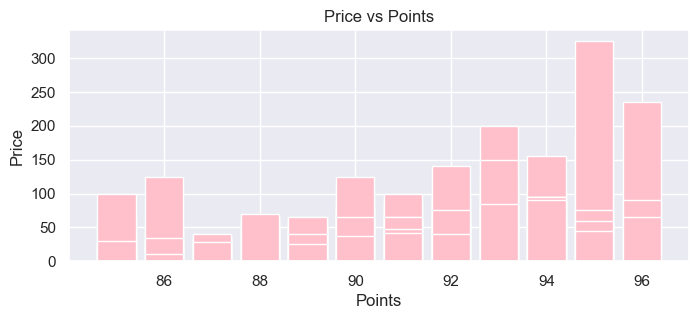

In [654]:
x = wine_df.points
y = wine_df.price
plt.figure(figsize=(8,3))
plt.bar(x,y, color='pink')
plt.title('Price vs Points')
plt.xlabel('Points')
plt.ylabel('Price')

# There is a general increase in price as the points increases.


Text(0.5, 0, 'Countries')

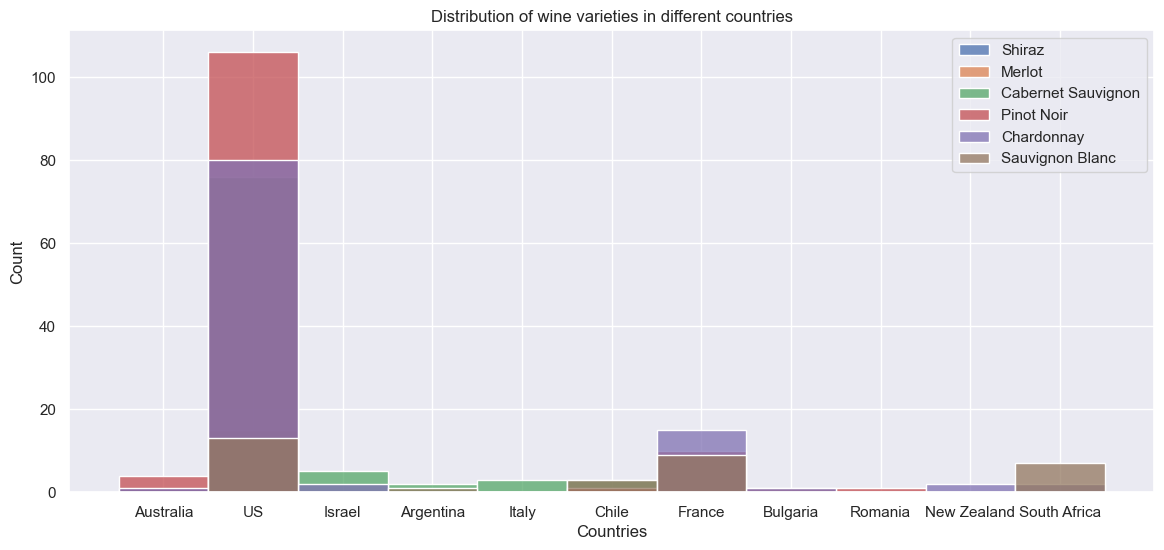

In [661]:
# Show distribution of wine varieties in countries.
plt.figure(figsize=(14,6))
sns.histplot(wine_df.loc[wine_df.variety == 'Shiraz']['country'], label = 'Shiraz')
sns.histplot(wine_df.loc[wine_df.variety == 'Merlot']['country'], label = 'Merlot')
sns.histplot(wine_df.loc[wine_df.variety == 'Cabernet Sauvignon']['country'], label = 'Cabernet Sauvignon')
sns.histplot(wine_df.loc[wine_df.variety == 'Pinot Noir']['country'], label = 'Pinot Noir')
sns.histplot(wine_df.loc[wine_df.variety == 'Chardonnay']['country'], label = 'Chardonnay')
sns.histplot(wine_df.loc[wine_df.variety == 'Sauvignon Blanc']['country'], label = 'Sauvignon Blanc')
plt.legend(loc='upper right')
plt.title('Distribution of wine varieties in different countries')
plt.xlabel('Countries')